In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # Set Default Size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

**Exercise:** Implement the following function, which pads all the images of a batch of examples X with zeros. Use np.pad. Note if you want to pad the array "a" of shape  (5,5,5,5,5)  with pad = 1 for the 2nd dimension, pad = 3 for the 4th dimension and pad = 0 for the rest, you would do:

a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), mode='constant', constant_values = (0,0))

In [2]:
A = np.array([1, 2, 3, 4, 5])
np.pad(A, (2,3), 'constant')

array([0, 0, 1, 2, 3, 4, 5, 0, 0, 0])

In [6]:
A = np.array([[1,2],[3,4]])
print(A.shape)
np.pad(A, ((1,2),(2,1)), 'constant')

(2, 2)


array([[0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0],
       [0, 0, 3, 4, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [8]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x

array([[[[ 1.62434536, -0.61175641],
         [-0.52817175, -1.07296862],
         [ 0.86540763, -2.3015387 ]],

        [[ 1.74481176, -0.7612069 ],
         [ 0.3190391 , -0.24937038],
         [ 1.46210794, -2.06014071]],

        [[-0.3224172 , -0.38405435],
         [ 1.13376944, -1.09989127],
         [-0.17242821, -0.87785842]]],


       [[[ 0.04221375,  0.58281521],
         [-1.10061918,  1.14472371],
         [ 0.90159072,  0.50249434]],

        [[ 0.90085595, -0.68372786],
         [-0.12289023, -0.93576943],
         [-0.26788808,  0.53035547]],

        [[-0.69166075, -0.39675353],
         [-0.6871727 , -0.84520564],
         [-0.67124613, -0.0126646 ]]],


       [[[-1.11731035,  0.2344157 ],
         [ 1.65980218,  0.74204416],
         [-0.19183555, -0.88762896]],

        [[-0.74715829,  1.6924546 ],
         [ 0.05080775, -0.63699565],
         [ 0.19091548,  2.10025514]],

        [[ 0.12015895,  0.61720311],
         [ 0.30017032, -0.35224985],
         [-1.14251

In [10]:
np.pad(x, ((0,0), (2,2), (2,2), (0,0))).shape

(4, 7, 7, 2)

In [11]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)
    
    return X_pad

In [12]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)


In [13]:
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


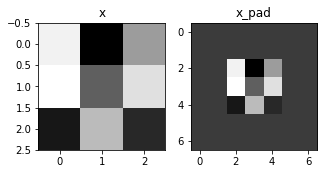

In [15]:
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [16]:
def test_pad(X, pad):
    X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values=0)
    return X_pad

In [19]:
np.random.seed(1)
x = np.random.randn(4,3,3,2)
x_pad = test_pad(x,3)
print(x.shape)
print(x_pad.shape)

(4, 3, 3, 2)
(4, 9, 9, 2)


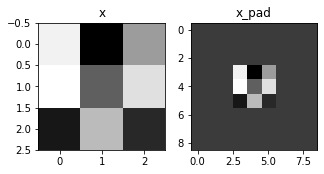

In [21]:
fig, ax = plt.subplots(1,2)
ax[0].set_title('x')
ax[0].imshow(x[0,:,:,0])
ax[1].set_title('x_pad')
ax[1].imshow(x_pad[0,:,:,0])

In [22]:
def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """
    
    # Element-wise product between a_slice_prev and W. Do not add the bias yet.
    s = a_slice_prev * W
    # Sum over all entries of the volume s.
    Z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    Z = float(Z + b)

    return Z

In [23]:
np.random.seed(1)
a_slice_prev = np.random.randn(4,4,3)
W = np.random.randn(4,4,3)
b = np.random.randn(1,1,1)

Z = conv_single_step(a_slice_prev, W, b)
print(f"Z = {Z}")

Z = -6.999089450680221
